### 신경망 모델 훈련

#### 손실 곡선

- 아래는 fit() 메서드 실행 시, 실행 결과를 자동으로 출력한 것. => **History 클래스 객체를 반환**
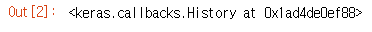


- History 객체에는 훈련 과정에서 계산한 지표, 즉 손실과 정확도 값이 저장.
- 이 값을 사용하면, 그래프를 그릴 수 있다.

### 함수를 이용하여 layer 구성

In [1]:
import tensorflow as tf
from tensorflow import keras

from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

from sklearn.model_selection import train_test_split
train_scaled = train_input/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)


def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu', name='hidden'))
    
    if a_layer:
        model.add(a_layer)
    
    model.add(keras.layers.Dense(10, activation='softmax', name='output'))
    
    return model    

In [2]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
## verbose = 0 => 에포크마다 진행 막대와 함께 손실 등의 지표가 출력
## 2일 경우, 진행막대를 빼고 출력
## 0일 경우, 훈련과정을 나타내지 않음
## 1일 경우, 기본값.
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

#### history객체에는 훈련 측정값이 담겨 있는 history딕셔너리가 들어있음.

In [5]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


### history 속성에 포함된 손실과 정확도는 에포크마다 계산한 값이 순서대로 나열된 단순한 리스트
- 맷플롯립을 사용해 그래프로 추출 가능

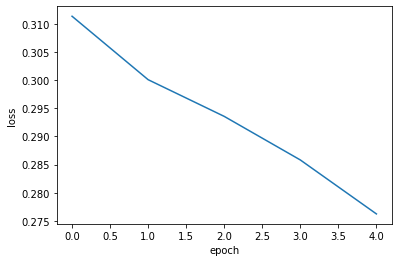

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

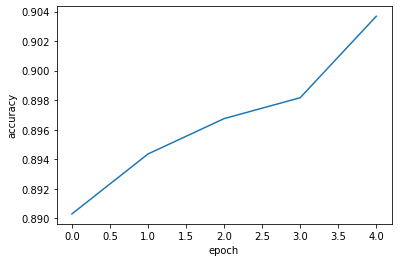

In [8]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

### 확실히 에포크마다 손실이 감소하고 정확도가 향상
### 에포크를 늘려서 더 훈련해 볼 경우, 어떠한 지 확인

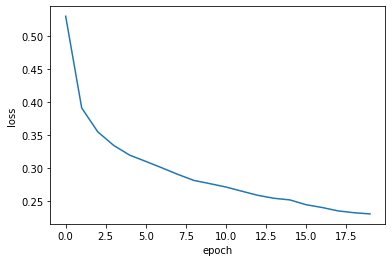

In [14]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

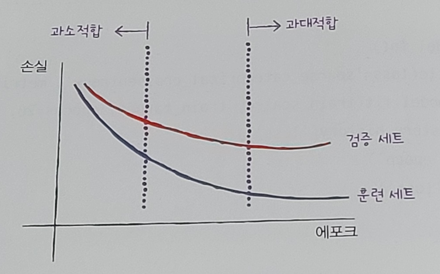

### 예상대로 손실이 잘 감소하지만, 과대적합(overfitting)이 발생하여 새로운 데이터에 대해서는 문제 발생.
### 인공 신경망 모델이 최적화하는 대상은 정확도가 아니라 손실함수이다.

In [15]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

#### 반환된 history.history 딕셔너리에 어떤 값이 있는 지 확인.

In [12]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### 과대/과소적합 문제를 조사하기 위해 훈련 손실과 검증 손실 그래프 확인

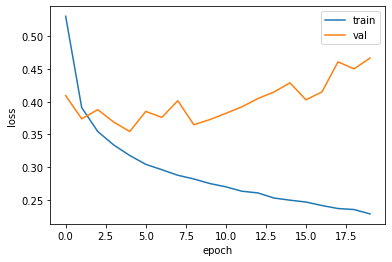

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### investigation
- val 손실 곡선이 4번째 에포크에서 다시 상승.
- train은 꾸분히 감소하기에 전형적인 과대적합 모델이 생성.
- 과대적합을 막기 위해, **신경망 규제 방법**이 필요함.
- 혹은, **옵티마이저 하이퍼파라미터**를 조정하여 과대적합을 완화 가능.

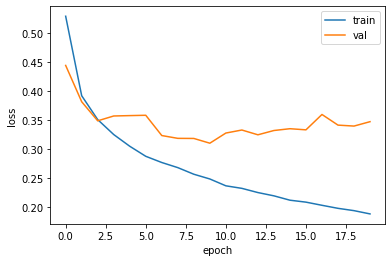

In [17]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### Result
- 과대적합이 휠씬 감소
- 검증 손실 그래프가 9번째 에포크까지 전반적인 감소 추세가 유지
- [adam] 옵티마이저가 이 데이터셋에 잘 맞는다.
- 학습률을 조정해서 다시 시도 가능.